# Bianco Research Group - Summer 2019

In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Potentially useful astropy stuff
import astropy
import astropy.io.ascii as ascii
from astropy.table import Table
from astropy.io import fits
from astropy.stats import LombScargle
from astropy.stats import sigma_clipped_stats
from astropy.stats import sigma_clip
from astropy.modeling import powerlaws
from astropy import constants as const
from astropy import units as u

#For reading in and organizing data
import pandas as pd
import requests
import json

#Misc
import scipy
from scipy import stats
from scipy.optimize import curve_fit
from collections import Counter
import itertools
import seaborn as sns

#Making Figures look nice
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 48

In [2]:
astropy.__version__

'3.2.1'

In [3]:
#From NASA's Exoplanet Archive API:
url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=k2targets&select=epic_number,k2_dist,k2_teff,k2_rad,k2_mass,k2_bjmag,k2_vjmag,k2_gmag,k2_imag&format=CSV"

In [4]:
df = pd.read_csv(url) #Reads above CSV table into a pandas dataframe

In [5]:
df #Have a look at the dataframe

,epic_number,k2_dist,k2_teff,k2_rad,k2_mass,k2_bjmag,k2_vjmag,k2_gmag,k2_imag
0,60018365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60018369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60018371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60018372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60018374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,60018376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,60018377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,60018378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,60018380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,60018381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note that this is not the full K2 dataset, I only selected the columns I thought would be useful

In [6]:
df.columns #So we can see all the column labels

Index(['epic_number', 'k2_dist', 'k2_teff', 'k2_rad', 'k2_mass', 'k2_bjmag',
       'k2_vjmag', 'k2_gmag', 'k2_imag'],
      dtype='object')

Let's make a quick and dirty H-R diagram:

In [7]:
df['k2_L'] = 4 * np.pi * (df['k2_rad'] * const.R_sun)**2 * const.sigma_sb * df['k2_teff']**4 
#Adding a column for luminosity in (Watts)

In [8]:
df['k2_teff'].max(),df['k2_teff'].min()
#To get an idea of the window size

(33037.0, 1708.0)

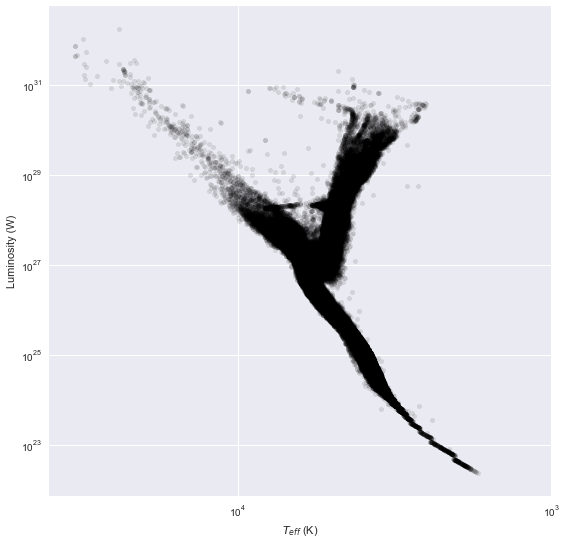

In [9]:
#Plot the HR diagram:
df.plot.scatter(x='k2_teff',y='k2_L', loglog=True, color='k', s=20, alpha=0.1, figsize=(9,9))
plt.xlim(40000,1000)
plt.xlabel(r'$T_{eff}$ (K)')
plt.ylabel('Luminosity (W)')

Covey et al. (2007) has a table of spectral types as a function of synth. g-i color. Maybe can use this?

In [10]:
df['k2_g-i'] = df['k2_gmag'] - df['k2_imag']

In [11]:
def gi_to_ST(k2_gi):
    
    '''
    This function takes an array of g-i magnitudes and assigns them a spectral type 
    using a dictionary constructed from Table 2 from Covey et. al. 2007. (Table has
    characteristic uncertainties of 0.05 magnitudes)
    
    returns: list of strings
    '''
    
    gi_dict = {'O5 or earlier': -1.00,
    'O9': -0.97,
    'B0' : -0.94,
    'B1' : -0.82,
    'B3' : -0.72,
    'B8' : -0.57,
    'B9' : -0.51,
    'A0' : -0.44,
    'A2' : -0.39,
    'A3' : -0.30,
    'A5' : -0.21,
    'A7' : -0.10,
    'F0' : 0.09,
    'F2' : 0.22,
    'F5' : 0.29,
    'F6' : 0.36,
    'F8' : 0.45,
    'G0' : 0.52,
    'G2' : 0.60,
    'G5' : 0.65,
    'G8' : 0.76,
    'K0' : 0.83,
    'K2' : 1.02,
    'K3' : 1.17,
    'K4' : 1.38,
    'K5' : 1.59,
    'K7' : 1.88,
    'M0' : 1.95,
    'M1' : 2.10,
    'M2' : 2.28,
    'M3' : 2.66,
    'M4' : 2.99,
    'M5' : 3.32,
    'M6 or later' : 3.84}

    st_list = ['']*len(k2_gi) #List of empty strings that we will be filled with spectral types
    
    
    #Go thru each g-i and assign it a spectral type key from the above dictionary
    #for i in range(10000):
    for i in range(len(k2_gi)):
        if i % 40000 == 0:
            print('Progress = '+str(i/4000)+'%')#To keep track of loop progress
            
        if np.isnan(k2_gi[i]) == True: #Disregard NaNs before checking dict
            st_list[i] = 'No g-i'
        
        else:#Check dict for value closest to the g-i color of each target, then assign key as its spectral type
            
            diffs = np.zeros(len(gi_dict))
        
            j=0
            
            sp_ty = ['']*len(gi_dict)
            
            for spec_type, gi in gi_dict.items():
            
                diffs[j] = abs(k2_gi[i]-gi)
                
                sp_ty[j] = spec_type
                
                j += 1
            
            #print(diffs, len(diffs))
            min_diff = np.argmin(diffs)
            #print(min_diff,sp_ty[min_diff])
            st_list[i] = sp_ty[min_diff]
            
    return st_list

In [12]:
df['Spec_Type'] = gi_to_ST(df['k2_g-i'])

Progress = 0.0%
Progress = 10.0%
Progress = 20.0%
Progress = 30.0%
Progress = 40.0%
Progress = 50.0%
Progress = 60.0%
Progress = 70.0%
Progress = 80.0%
Progress = 90.0%


In [13]:
df

,epic_number,k2_dist,k2_teff,k2_rad,k2_mass,k2_bjmag,k2_vjmag,k2_gmag,k2_imag,k2_L,k2_g-i,Spec_Type
0,60018365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i
1,60018369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i
2,60018371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i
3,60018372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i
4,60018374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i
5,60018376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i
6,60018377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i
7,60018378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i
8,60018380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i
9,60018381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No g-i


In [14]:
df['k2_g-i'].min()

-2.4140000000000015

In [15]:
df['k2_g-i'].max()

11.806000000000001

Hmmm.... Definitely stars earlier than 05 and later than M6 in the data.

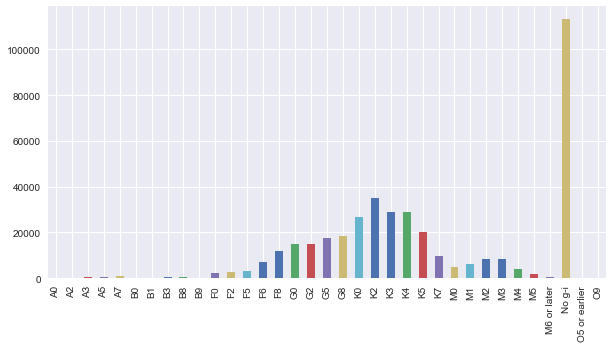

In [16]:
#Make a bar plot to see (roughly) how many of each spectral type there are:
from collections import Counter
pd.Series(Counter(df['Spec_Type'])).plot(kind='bar',figsize=(10,5))

In [17]:
#Just to see the exact values:
Counter(df['Spec_Type'])

Counter({'A0': 162,
         'A2': 195,
         'A3': 293,
         'A5': 385,
         'A7': 1064,
         'B0': 56,
         'B1': 153,
         'B3': 241,
         'B8': 291,
         'B9': 204,
         'F0': 2329,
         'F2': 2655,
         'F5': 3294,
         'F6': 6969,
         'F8': 11618,
         'G0': 14789,
         'G2': 14979,
         'G5': 17576,
         'G8': 18353,
         'K0': 26779,
         'K2': 35201,
         'K3': 28935,
         'K4': 28950,
         'K5': 19983,
         'K7': 9661,
         'M0': 4925,
         'M1': 6081,
         'M2': 8551,
         'M3': 8285,
         'M4': 3900,
         'M5': 1556,
         'M6 or later': 500,
         'No g-i': 113249,
         'O5 or earlier': 76,
         'O9': 7})

In [18]:
cmap = plt.get_cmap('RdYlBu')
names = ['O5 or earlier',
    'O9',
    'B0',
    'B1',
    'B3',
    'B8',
    'B9',
    'A0',
    'A2',
    'A3',
    'A5',
    'A7',
    'F0',
    'F2',
    'F5',
    'F6',
    'F8',
    'G0',
    'G2',
    'G5',
    'G8',
    'K0',
    'K2',
    'K3',
    'K4',
    'K5',
    'K7',
    'M0',
    'M1',
    'M2',
    'M3',
    'M4',
    'M5',
    'M6 or later']
colors = cmap(np.linspace(1, 0, len(names)))
print(colors)

[[0.19215686 0.21176471 0.58431373 1.        ]
 [0.21368704 0.27958478 0.61768551 1.        ]
 [0.23829296 0.35709343 0.65582468 1.        ]
 [0.26289889 0.43460208 0.69396386 1.        ]
 [0.31034218 0.50618993 0.73041138 1.        ]
 [0.3609381  0.56647443 0.76163014 1.        ]
 [0.41876201 0.63537101 0.79730873 1.        ]
 [0.48027682 0.69873126 0.83068051 1.        ]
 [0.5479431  0.75286428 0.86020761 1.        ]
 [0.6071511  0.80023068 0.88604383 1.        ]
 [0.67466359 0.85297962 0.91487889 1.        ]
 [0.73986928 0.88496732 0.93333333 1.        ]
 [0.80507497 0.91695502 0.95178777 1.        ]
 [0.86212995 0.94494425 0.96793541 1.        ]
 [0.90703576 0.96401384 0.91995386 1.        ]
 [0.94517493 0.97877739 0.84982699 1.        ]
 [0.98331411 0.99354095 0.77970012 1.        ]
 [0.99946175 0.98331411 0.72372165 1.        ]
 [0.99823145 0.94517493 0.66589773 1.        ]
 [0.99700115 0.90703576 0.60807382 1.        ]
 [0.99577086 0.86305267 0.5502499  1.        ]
 [0.99469435 

In [19]:
teff_na = df['k2_teff'].dropna()
L_na = df['k2_L'].dropna()

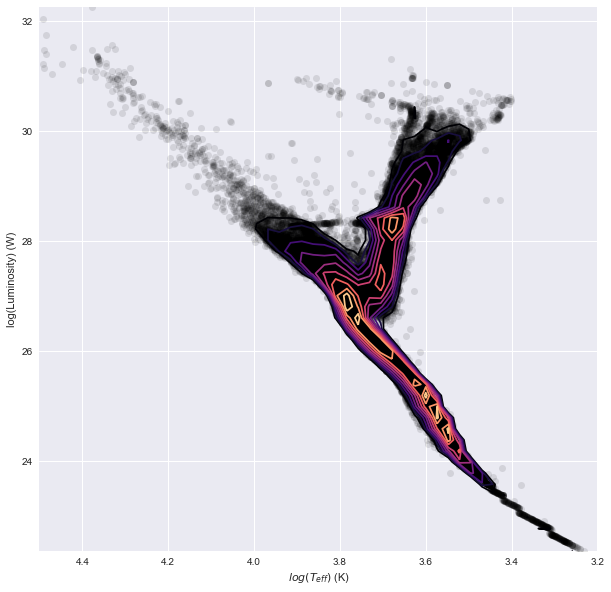

In [20]:
from astroML import plotting

ax = plt.figure(figsize=(10,10)).add_subplot()
plotting.scatter_contour(np.log10(teff_na), np.log10(L_na), threshold=50, log_counts=True, ax=ax,
                histogram2d_args=dict(bins=50),
                filled_contour=False,
                plot_args=dict(marker='o', linestyle='none', color='black', alpha=0.1),
                contour_args=dict(cmap=plt.cm.magma))
plt.ylabel('log(Luminosity) (W)')
plt.xlabel(r'$log(T_{eff})$ (K)')
plt.xlim(4.5,3.2)
plt.savefig("k2scatter_contour.png")

## Flare rates from Paudel et al 2018

### Reading in and viewing data

In [240]:
url = "https://iopscience.iop.org/0004-637X/858/1/55/suppdata/apjaab8fet3_mrt.txt"

In [241]:
table3 = pd.read_csv(url, sep=" ", skiprows=list(range(18)))
table3.columns = ["EPIC", "Ptime", "Duration", "logE"]

HTTPError: HTTP Error 503: Service Unavailable

In [ ]:
table3

In [ ]:
spec_list = ["M6.5", "M8", "M7.5", "M7.5", "M7", "M8", "M6.5", "M8.5", "L0", "L0"]

### Visualizing distribution of flare energy in each target

In [ ]:
#Loops through above dataframe and makes histogram of log flare energy (erg) for each target

fig, axs = plt.subplots(2, 5, figsize=(20,10))
axs = np.ravel(axs)
fig.tight_layout()
nflare = np.zeros(10)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
for i, epic in enumerate(set(table3['EPIC']),start=0):
    star = np.where(table3['EPIC'] == epic)[0]
    axs[i].hist(table3['logE'][star],bins=10)
    nflare[i] = len(table3['EPIC'][star])


j = 0
for ax in axs:
    ax.set_xlabel('logE (erg)')
    ax.set_ylabel('# of Flares')
    ax.annotate(r'$N_{flare}$ = '+str(int(nflare[j])), (31,12), fontsize = 18)
    ax.set_ylim(0,14)
    ax.set_xlim(29,33)
    epic = list(set(table3['EPIC']))
    ax.set_title('EPIC '+str(epic[j])+' - '+str(spec_list[j]))
    j += 1
plt.savefig('Figures/flar_hists.png')

### K-S and A-D tests:

In [ ]:
#K-S tests:

for i in range(10):
#    print("K-S tests for EPIC {} vs:".format(list(set(data['EPIC']))[i]))
    for e in range(10):
        star1 = np.where(table3['EPIC'] == list(set(table3['EPIC']))[i])[0]
        star2 = np.where(table3['EPIC'] == list(set(table3['EPIC']))[e])[0]
    
#        print("EPIC {}".format(list(set(data['EPIC']))[e])+":  "+str(stats.ks_2samp(data['logE'][star1],data['logE'][star2])[1]))
#    print(" ")

In [ ]:
ks_arr = np.zeros((10,10))

for i in range(10):
    for e in range(10):
        star1 = np.where(table3['EPIC'] == list(set(table3['EPIC']))[i])[0]
        star2 = np.where(table3['EPIC'] == list(set(table3['EPIC']))[e])[0]
        ks_pval = stats.ks_2samp(table3['logE'][star1],table3['logE'][star2])[1]
        ks_arr[i][e] = ks_pval

In [ ]:
#Heatmap to visualize K-S test results

ax = plt.figure(figsize=(9,9))

ax = sns.heatmap(ks_arr, cmap='bone', cbar_kws=dict(label="K-S p-value"), annot=True, fmt='0.1f', 
            xticklabels=list(set(table3['EPIC'])), yticklabels=list(set(table3['EPIC'])))

ax.set_xlabel("EPIC ID")
ax.set_ylabel("EPIC ID")

plt.savefig('Figures/ks_map.png')

In [ ]:
#Same heatmap with spectral types instead of EPIC numbers

ax = plt.figure(figsize=(9,9))

ax = sns.heatmap(ks_arr, cmap='bone', cbar_kws=dict(label="K-S p-value"), annot=True, fmt='0.1f', 
            xticklabels=spec_list, yticklabels=spec_list)

ax.set_xlabel("Spectral Type")
ax.set_ylabel("Spectral Type")
ax.set_title('K-S Tests')

plt.savefig('Figures/ks_map_spec.png')

In [ ]:
ad_stat = np.zeros(10)
ad_critvals = np.zeros((10,5))
for i in range(10):
    star = np.where(data['EPIC'] == list(set(data['EPIC']))[i])[0]
    
    ad_stat[i] = stats.anderson(data['logE'][star], dist='norm')[0]
    ad_critvals[i][:] = stats.anderson(data['logE'][star], dist='norm')[1]

    print('A-D test 1: ' + str(list(set(data['EPIC']))[i]) + '  A-D stat = {}'.format(ad_stat[i])+ 
          ',  A-D critical values (15%,10%,5%,2.5%,1%) = {}'.format(ad_critvals[i]))  

In [ ]:
ad_arr = np.zeros((10,10))

for i in range(10):
    for e in range(10):
        star1 = np.where(data['EPIC'] == list(set(data['EPIC']))[i])[0]
        star2 = np.where(data['EPIC'] == list(set(data['EPIC']))[e])[0]
        arr1 = np.array(data['logE'][star1])
        arr2 = np.array(data['logE'][star2])
        
        ad_stat = stats.anderson_ksamp(np.array([arr1,arr2]))[0]
        ad_critvals = stats.anderson_ksamp(np.array([arr1,arr2]))[1]
        
        if ad_stat < ad_critvals[2]: #Test vs. 5% confidence level
            ad_arr[i][e] = 1 #reject H0
        else:
            ad_arr[i][e] = 0 #not enough evidence to reject H0

In [ ]:
ax = plt.figure(figsize=(9,9))

ax = sns.heatmap(ad_arr, cmap='gray', cbar_kws=dict(label="1 : Reject H0, 0 : Cannot reject H0"), annot=True, fmt='0.1f', 
            xticklabels=spec_list, yticklabels=spec_list)

ax.set_xlabel("Spectral Type")
ax.set_ylabel("Spectral Type")
ax.set_title("A-D Test - 5% Confidence Level")

plt.savefig('Figures/ad_map_spec.png')

## Replicating FFDs from Rishi's paper

In [ ]:
tar1 = np.where(data['EPIC'] == 212826600)[0]
tar1_t = data['Ptime'][tar1]
tar1_E = data['logE'][tar1]

plt.scatter(tar1_t,tar1_E)
plt.xlabel('BJD-2454833')
plt.ylabel('log E (erg)')

In [ ]:
c=Counter(tar1_E)
c = dict(c)
c

In [ ]:
energies = list(c.keys())
freqs = list(c.values())
cumul_freq = np.zeros((2,len(freqs)))

for e in range(len(energies)):
    cumul_freq[0][e] = energies[e]
    count = 0
    for f in range(len(energies)):
        
        if (energies[e] == energies[f]) or (energies[e] < energies[f]):
            count += freqs[f]
            
        else:
            pass
        
        cumul_freq[1][e] = count
        
print(cumul_freq)

In [ ]:
tar1_days = tar1_t.max() - tar1_t.min()

tar1_hours = tar1_days * 24

np.log10(1 / tar1_hours)

flr_engs = cumul_freq[0][:]
logflrfreq = np.log10(cumul_freq[1][:] / tar1_hours)

In [ ]:
plt.scatter(flr_engs,logflrfreq, c='k')
plt.ylabel(r'log$\nu$ (hr$^{-1})$')
plt.xlabel('log E (erg)')
plt.title("FFD - EPIC 206135809 - M6.5")
plt.savefig('Figures/ffd1.png')

In [ ]:
def bpl(x, A, x_break, alpha_1, alpha_2):
    return powerlaws.BrokenPowerLaw1D.evaluate(x, A, x_break, alpha_1, alpha_2)

#plt.scatter(flr_engs, bpl(flr_engs,-2,30.5,-2,-5), marker='*')

popt, pcov = curve_fit(bpl, flr_engs, logflrfreq, p0 = (-1.75,30,-2,-5))

plt.scatter(flr_engs,logflrfreq, c='k', marker='o', label='Data')
plt.scatter(flr_engs, bpl(flr_engs,*popt), marker='*', c='red', label='Broken Power Law')
plt.axvline(x=popt[1], c='k', ls='--')
print('Amp = '+str(popt[0]) + ', E_break = ' + str(popt[1]) + ', slope_1 = ' + str(popt[2]) + 
      ', slope_2 = ' + str(popt[3]))
plt.ylabel(r'log$\nu$ (hr$^{-1})$')
plt.xlabel('log E (erg)')
plt.title("FFD - EPIC 212826600 - M7.5")
plt.legend()
plt.savefig('Figures/ffd1_bplfit.png')

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20,10))
axs = np.ravel(axs)
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
for i, epic in enumerate(set(data['EPIC']),start=0):
    
    tar = np.where(data['EPIC'] == epic)[0]
    tar_t = data['Ptime'][tar]
    tar_E = data['logE'][tar]
    
    c=Counter(tar_E)
    c = dict(c)
    
    energies = list(c.keys())
    freqs = list(c.values())
    cumul_freq = np.zeros((2,len(freqs)))

    for e in range(len(energies)):
        cumul_freq[0][e] = energies[e]
        count = 0
        for f in range(len(energies)):
        
            if (energies[e] == energies[f]) or (energies[e] < energies[f]):
                count += freqs[f]
            
            else:
                pass
        
            cumul_freq[1][e] = count
    
    tar_days = tar_t.max() - tar_t.min()

    tar_hours = tar_days * 24

    np.log10(1 / tar_hours)

    flr_engs = cumul_freq[0][:]
    
    logflrfreq = np.log10(cumul_freq[1][:] / tar_hours)
    
    axs[i].scatter(flr_engs,logflrfreq, c='k', marker = 'd')
    
#for ax in axs:
#    ax.label_outer()

j = 0
for ax in axs:
    ax.set_xlabel('logE (erg)')
    ax.set_ylabel(r'log$\nu$ (hr$^{-1}$)')
    epic = list(set(data['EPIC']))
    ax.set_ylim(-3.5,-1)
    ax.set_xlim(29,33)
    ax.set_title('EPIC '+str(epic[j])+' - '+str(spec_list[j]))
    j += 1
    
plt.savefig('Figures/ffds.png')

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20,10))
axs = np.ravel(axs)
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
for i, epic in enumerate(set(data['EPIC']),start=0):
    
    tar = np.where(data['EPIC'] == epic)[0]
    tar_t = data['Ptime'][tar]
    tar_E = data['logE'][tar]
    
    c=Counter(tar_E)
    c = dict(c)
    
    energies = list(c.keys())
    freqs = list(c.values())
    cumul_freq = np.zeros((2,len(freqs)))

    for e in range(len(energies)):
        cumul_freq[0][e] = energies[e]
        count = 0
        for f in range(len(energies)):
        
            if (energies[e] == energies[f]) or (energies[e] < energies[f]):
                count += freqs[f]
            
            else:
                pass
        
            cumul_freq[1][e] = count
    
    tar_days = tar_t.max() - tar_t.min()

    tar_hours = tar_days * 24

    np.log10(1 / tar_hours)

    flr_engs = cumul_freq[0][:]
    
    logflrfreq = np.log10(cumul_freq[1][:] / tar_hours)
    
    axs[i].scatter(flr_engs,logflrfreq, c='k', marker = 'd')
    
    m, b, _, _, _ = stats.linregress(flr_engs, logflrfreq)
    print(str(list(set(data['EPIC']))[i])+': m = ' + str(m))
    dom = np.linspace(flr_engs.min(), flr_engs.max())
    
    axs[i].plot(dom,m*dom + b,c='k',ls='--')
    
    
#for ax in axs:
#    ax.label_outer()

j = 0
for ax in axs:
    ax.set_xlabel('logE (erg)')
    ax.set_ylabel(r'log$\nu$ (hr$^{-1}$)')
    epic = list(set(data['EPIC']))
    ax.set_title('EPIC '+str(epic[j])+' - '+str(spec_list[j]))
    j += 1
    
plt.savefig('Figures/ffd_linfits.png')

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20,10))
axs = np.ravel(axs)
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
for i, epic in enumerate(set(data['EPIC']),start=0):
    
    tar = np.where(data['EPIC'] == epic)[0]
    tar_t = data['Ptime'][tar]
    tar_E = data['logE'][tar]
    
    c=Counter(tar_E)
    c = dict(c)
    
    energies = list(c.keys())
    freqs = list(c.values())
    cumul_freq = np.zeros((2,len(freqs)))

    for e in range(len(energies)):
        cumul_freq[0][e] = energies[e]
        count = 0
        for f in range(len(energies)):
        
            if (energies[e] == energies[f]) or (energies[e] < energies[f]):
                count += freqs[f]
            
            else:
                pass
        
            cumul_freq[1][e] = count
    
    tar_days = tar_t.max() - tar_t.min()

    tar_hours = tar_days * 24

    np.log10(1 / tar_hours)

    flr_engs = cumul_freq[0][:]
    
    logflrfreq = np.log10(cumul_freq[1][:] / tar_hours)
    
    axs[i].scatter(flr_engs[:-1],logflrfreq[:-1], c='k', marker = 'd')
    
    
    dom = np.linspace(flr_engs[:-1].min(), flr_engs[:-1].max())
    
    axs[i].plot(dom,m*dom + b,c='k',ls='--')
    
    
#for ax in axs:
#    ax.label_outer()

j = 0
for ax in axs:
    ax.set_xlabel('logE (erg)')
    ax.set_ylabel(r'log$\nu$ (hr$^{-1}$)')
    ax.set_ylim(-3.5,-1)
    ax.set_xlim(29,33)
    epic = list(set(data['EPIC']))
    ax.set_title('EPIC '+str(epic[j])+' - '+str(spec_list[j]))
    j += 1
    
plt.savefig('Figures/ffd_linfit2.png')

### Table 1 Data

In [ ]:
url = 'https://iopscience.iop.org/0004-637X/858/1/55/suppdata/apjaab8fet1_ascii.txt'

In [ ]:
table1 = pd.read_csv(url, sep="\t", usecols=[0,1,2,3,6,7], skiprows=[0,1,17,18,19,20,21,22])
table1.columns = ['Name', 'EPIC', 'K_p', 'J', 'Spt.', 'Dist']

In [ ]:
table1

In [ ]:
epic1 = list(table1['EPIC'])
kp = list(table1['K_p'])
dist = list(table1['Dist'])

In [ ]:
epic1

In [ ]:
dist_err = np.zeros(len(dist))

for i in range(len(dist)):
    if i == 1 or i== 7:
        pass
    else:
        dist_err[i] = float(dist[i][12:15])

dist_err

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(20,10))
axs = np.ravel(axs)
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)
for i, epic in enumerate(set(data['EPIC']),start=0):
    
    tar = np.where(data['EPIC'] == epic)[0]
    tar_t = data['Ptime'][tar]
    tar_E = data['logE'][tar]
    
    c=Counter(tar_E)
    c = dict(c)
    
    energies = list(c.keys())
    freqs = list(c.values())
    cumul_freq = np.zeros((2,len(freqs)))

    for e in range(len(energies)):
        cumul_freq[0][e] = energies[e]
        count = 0
        for f in range(len(energies)):
        
            if (energies[e] == energies[f]) or (energies[e] < energies[f]):
                count += freqs[f]
            
            else:
                pass
        
            cumul_freq[1][e] = count
    
    tar_days = tar_t.max() - tar_t.min()

    tar_hours = tar_days * 24

    np.log10(1 / tar_hours)

    flr_engs = cumul_freq[0][:]
    
    logflrfreq = np.log10(cumul_freq[1][:] / tar_hours)
    
    axs[i].scatter(flr_engs[:-1],logflrfreq[:-1], c='k', marker = 'd', label='Data')
    
    def bpl(x, A, x_break, alpha_1, alpha_2):
        return powerlaws.BrokenPowerLaw1D.evaluate(x, A, x_break, alpha_1, alpha_2)

    popt, pcov = curve_fit(bpl, flr_engs[:-1], logflrfreq[:-1], p0 = (-2,30,-2,-5))

    dom = np.linspace(flr_engs[:-1].min(), flr_engs[:-1].max())
    axs[i].plot(dom, bpl(dom,*popt), ls='-', c='purple', label='Broken Power Law')
    axs[i].axvline(x=popt[1], c='k', ls='--', label=r'$E_{break}$')
    
    
#for ax in axs:
#    ax.label_outer()

j = 0
for ax in axs:
    ax.set_xlabel('logE (erg)')
    ax.set_ylabel(r'log$\nu$ (hr$^{-1}$)')
    ax.set_ylim(-3.5,-1)
    ax.set_xlim(29,33)
    ax.legend()
    epic = list(set(data['EPIC']))
    
    for p in range(len(epic1)):
        if (epic1[p] == epic[j]):
            kep_mag = kp[p]
        else:
            pass
    
    ax.set_title(r'EPIC '+str(epic[j])+' / '+str(spec_list[j])+' / $K_p$ = '+str(kep_mag))
    j += 1
    
plt.savefig('Figures/ffd_BPLfit.png')

### Reading in Lightcurves to get ED uncertainties

In [2]:
fits_file = "https://archive.stsci.edu/missions/k2/lightcurves/c3/206100000/35000/ktwo206135809-c03_llc.fits"

In [3]:
fits.getdata(fits_file, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E13.6'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; uni

In [4]:
with fits.open(fits_file, mode="readonly") as hdulist:
    k2_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    sap_errors = hdulist[1].data['SAP_FLUX_ERR']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']
    pdcsap_fluxes_err = hdulist[1].data['PDCSAP_FLUX_ERR']


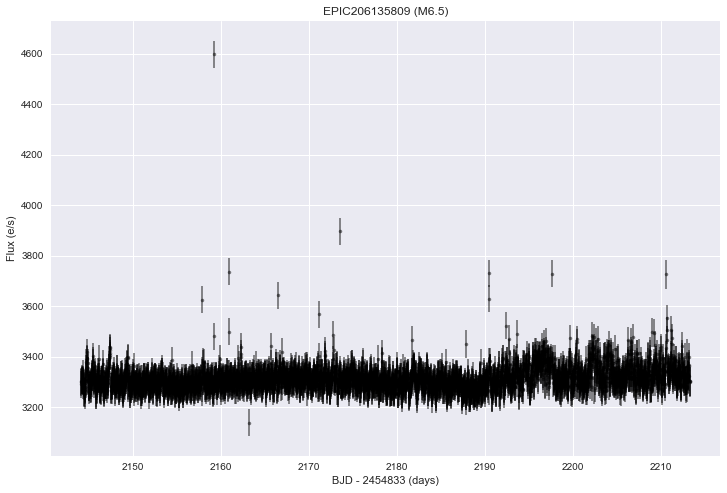

In [5]:
### Start figure and axis.
fig, ax = plt.subplots()
fig.set_size_inches(12., 8.)

# Plot the timeseries in black circles.
#ax.plot(k2_bjds, pdcsap_fluxes, 'ko')
ax.errorbar(k2_bjds, pdcsap_fluxes, 
             yerr=pdcsap_fluxes_err*10, fmt='.', color='k', alpha=0.5)

ax.set_ylabel("Flux (e/s)")
ax.set_xlabel("BJD - 2454833 (days)")
ax.set_title('EPIC206135809 (M6.5)')
plt.savefig('Figures/EPIC206135809_lc.png')

In [6]:
pdcsap_fluxes

array([      nan, 3290.1665, 3298.2244, ..., 3302.8389, 3302.9788,
       3298.6155], dtype=float32)

In [7]:
#Filtering nans from data
flux = pdcsap_fluxes[(~np.isnan(pdcsap_fluxes)) & (~np.isnan(k2_bjds))][:500]
#pdcsap_fluxes[np.where(np.isnan(pdcsap_fluxes) == False)[0]]
fluxerr = pdcsap_fluxes_err[np.where(np.isnan(pdcsap_fluxes_err) == False)[0]][:500]
bjd = k2_bjds[np.where((np.isnan(k2_bjds) == False) & (np.isnan(pdcsap_fluxes) == False))[0]][:500]

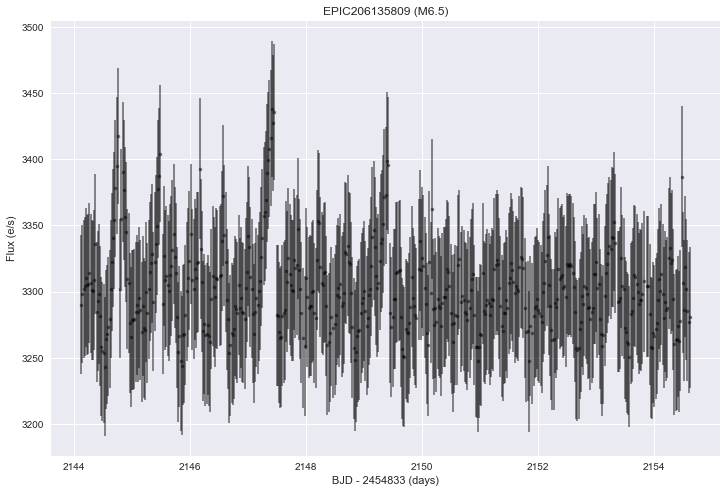

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(12., 8.)
plt.errorbar(bjd, flux, yerr=fluxerr*10, fmt='k.',alpha=0.5)
ax.set_ylabel("Flux (e/s)")
ax.set_xlabel("BJD - 2454833 (days)")
ax.set_title('EPIC206135809 (M6.5)')
plt.savefig('Figures/EPIC206135809_lc.png')

In [22]:
len(np.where(bjd < 2145)[0]) / 3600 * 24

0.28

In [24]:
#Some borrowed code (from http://forrestbao.blogspot.com/2014/07/signal-filtering-using-inverse-fft-in.html)
#that does the FFT filtering with scipy:

def bandpass_ifft(X, Low_cutoff, High_cutoff, F_sample, M=None):
    """Bandpass filtering on a real signal using inverse FFT
    
    Inputs
    =======
    
    X: 1-D numpy array of floats, the real time domain signal (time series) to be filtered
    Low_cutoff: float, frequency components below this frequency will not pass the filter (physical frequency in unit of Hz)
    High_cutoff: float, frequency components above this frequency will not pass the filter (physical frequency in unit of Hz)
    F_sample: float, the sampling frequency of the signal (physical frequency in unit of Hz)    
    
    Notes
    =====
    1. The input signal must be real, not imaginary nor complex
    2. The Filtered_signal will have only half of original amplitude. Use abs() to restore. 
    3. In Numpy/Scipy, the frequencies goes from 0 to F_sample/2 and then from negative F_sample to 0. 
    
    """        
    
    #import scipy, numpy
    if M == None: # if the number of points for FFT is not specified
        M = X.size # let M be the length of the time series
    Spectrum = scipy.fft(X, n=M) 
    [Low_cutoff, High_cutoff, F_sample] = map(float, [Low_cutoff, High_cutoff, F_sample])
    
    #Convert cutoff frequencies into points on spectrum
    [Low_point, High_point] = map(lambda F: F/F_sample * M /2, [Low_cutoff, High_cutoff])# the division by 2 is because the spectrum is symmetric 

    Filtered_spectrum = [Spectrum[i] if i >= Low_point and i <= High_point else 0.0 for i in range(M)] # Filtering
    Filtered_signal = scipy.ifft(Filtered_spectrum, n=M)  # Construct filtered signal 
    return Spectrum, Filtered_spectrum, Filtered_signal, Low_point, High_point

In [81]:
Low_cutoff, High_cutoff, F_sample = 0, 50, 500
Spectrum, Filtered_spectrum, Filtered_signal, Low_point, High_point = bandpass_ifft(flux, Low_cutoff, High_cutoff, 
                                                                                    F_sample, M=len(bjd))

/Users/Riley/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/Riley/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


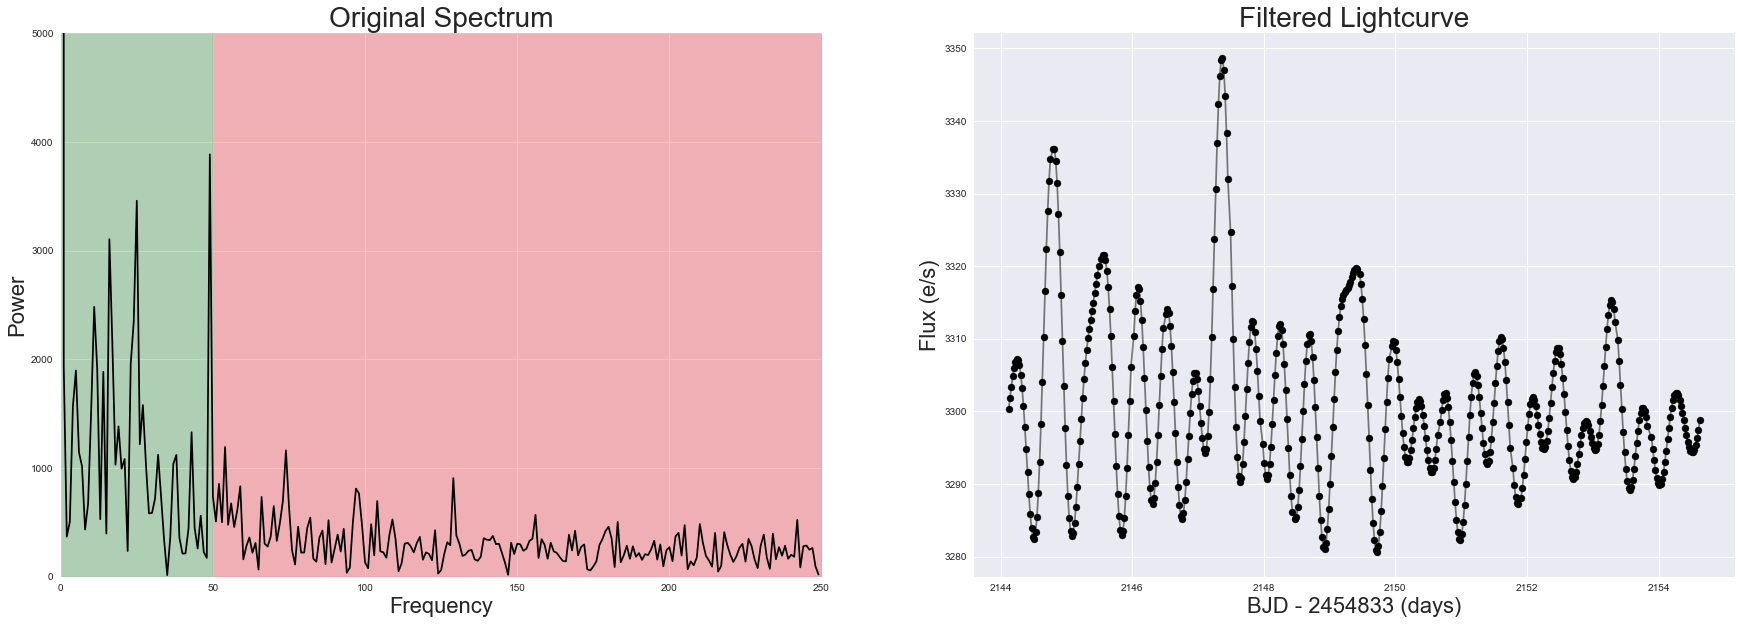

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(30,10))
axs = np.ravel(axs)
plt.rcParams.update({'font.size': 36})

axs[0].set_title('Original Spectrum',fontsize=28)
axs[1].set_title('Filtered Lightcurve',fontsize=28)

axs[0].set_xlim(0,F_sample/2)
axs[0].set_ylim(0,5000)

axs[0].set_xlabel('Frequency',fontsize=22)
axs[0].set_ylabel('Power',fontsize=22)

axs[1].set_xlabel('BJD - 2454833 (days)',fontsize=22)
axs[1].set_ylabel('Flux (e/s)',fontsize=22)

axs[0].plot(np.fft.fftfreq(len(bjd))[:250]*F_sample, abs(Spectrum[:250]), c='k')
axs[0].axvspan(Low_cutoff, High_cutoff, color='green', alpha = 0.25)
axs[0].axvspan(High_cutoff, 250, color='red', alpha = 0.25)
axs[1].scatter(bjd, Filtered_signal, color='k')
axs[1].plot(bjd, Filtered_signal, color='k',alpha=0.5)

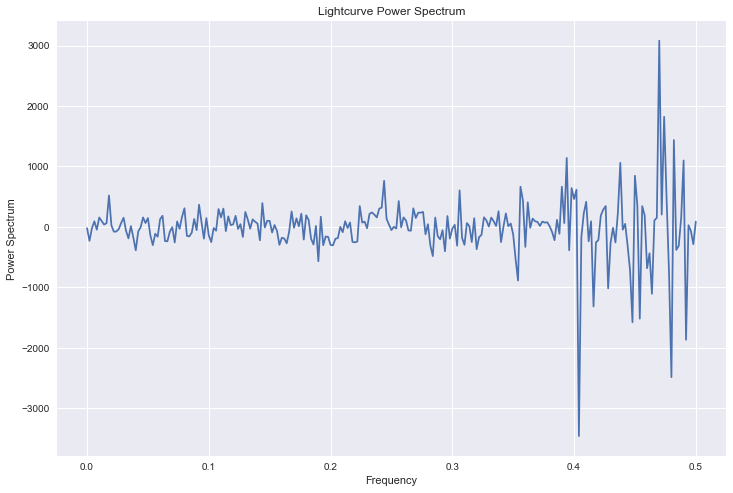

In [98]:
plt.figure(figsize=(12,8))

ps = (np.real(np.fft.fft(flux)))

plt.plot(np.fft.rfftfreq(int(len(ps))), ps[249:])

#plt.ylim(0,20000)
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.title('Lightcurve Power Spectrum')

In [70]:
len(np.fft.irfft(ps)), len(bjd), len(fluxerr)

(500, 500, 500)

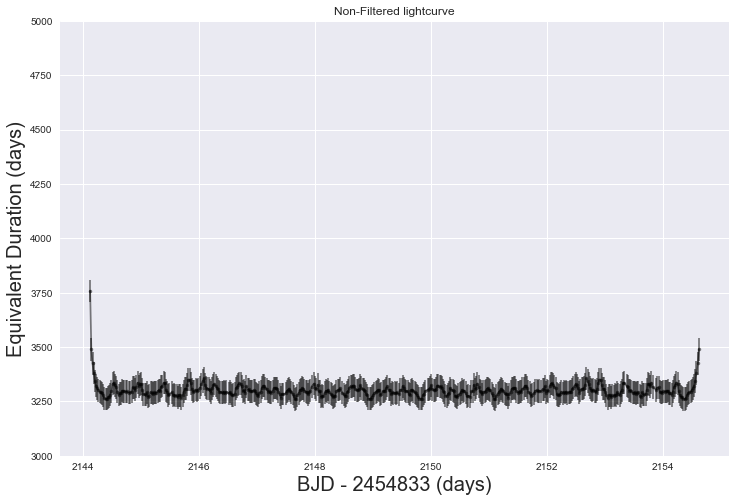

In [72]:
plt.figure(figsize=(12,8))

reinvflux = np.fft.irfft(ps)

#plt.errorbar(bjd[1:], reinvflux, yerr = fluxerr[1:]*10, c='k', marker='.', alpha=0.5)
plt.errorbar(bjd, reinvflux, yerr = fluxerr * 10, c='k', marker='.', alpha=0.5)

plt.ylim(3000,5000)
plt.ylabel('Equivalent Duration (days)', fontsize=20)
plt.xlabel('BJD - 2454833 (days)', fontsize=20)
plt.title('Non-Filtered lightcurve')

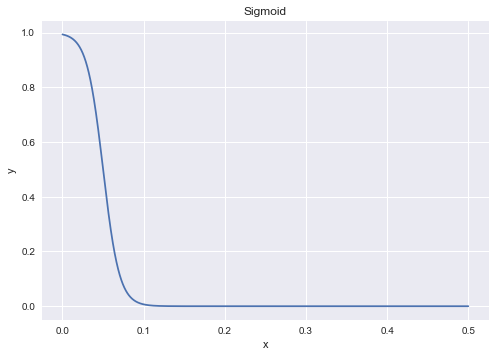

In [10]:
def sigmoid(x, k, m, hflip = False):
    
    if hflip == True:
        s = 1 / (1 + np.exp(-k*(x - m)))
    else:
        s = 1 / (1 + np.exp(-k*(-x + m)))
    return s

plt.plot(np.fft.rfftfreq(len(flux)), sigmoid(np.fft.rfftfreq(len(flux)),100,0.05))
plt.title("Sigmoid")
plt.xlabel("x")
plt.ylabel("y");

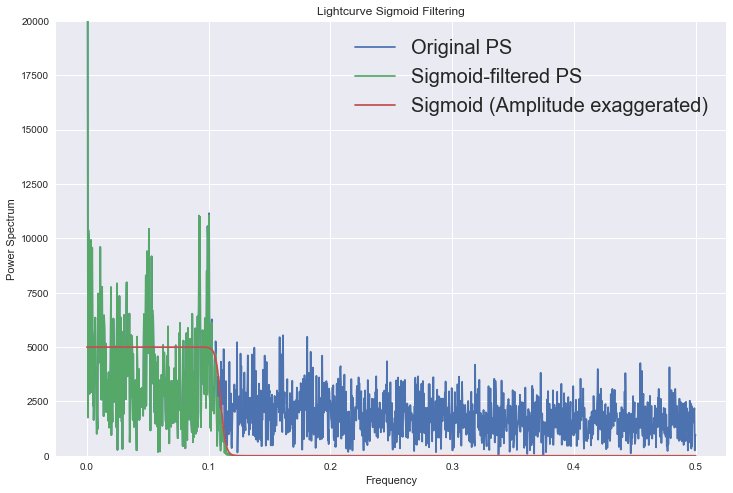

In [11]:
plt.figure(figsize=(12,8))

m = 0.11
k = 500

sigps = sigmoid(np.fft.rfftfreq(len(flux)), k, m) * np.abs(np.fft.rfft(flux))

plt.plot(np.fft.rfftfreq(len(flux)), np.abs(np.fft.rfft(flux)), label='Original PS')
plt.plot(np.fft.rfftfreq(len(flux)), sigps, label='Sigmoid-filtered PS')
plt.plot(np.fft.rfftfreq(len(flux)), 5000*sigmoid(np.fft.rfftfreq(len(flux)), k, m),
        label='Sigmoid (Amplitude exaggerated)')

plt.ylim(0,20000)
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.title('Lightcurve Sigmoid Filtering')
plt.legend(fontsize=20)
plt.savefig('Figures/lcfft.png')

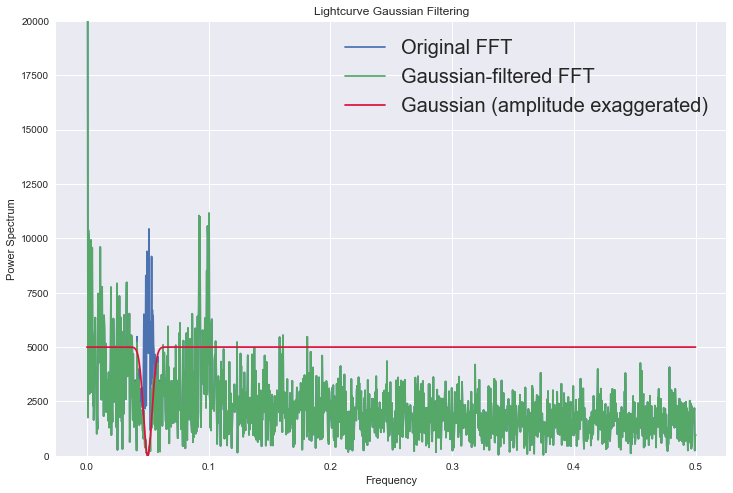

In [16]:
plt.figure(figsize=(12,8))

def invgaussian(m, s, x):
    g = -np.exp(-(m-x)**2 / s**2) + 1 
    return g

def exp(A, k, x, b):
    e = A * np.exp(-k*(x + b))
    return e

m = 0.05
s = 0.005


gaups = np.abs(np.fft.rfft(flux)) * invgaussian(m, s, np.fft.rfftfreq(len(flux)))

plt.plot(np.fft.rfftfreq(len(flux)), np.abs(np.fft.rfft(flux)), label='Original FFT')
plt.plot(np.fft.rfftfreq(len(flux)), gaups, label='Gaussian-filtered FFT')
plt.plot(np.fft.rfftfreq(len(flux)), 5000*invgaussian(m, s, np.fft.rfftfreq(len(flux))), c='crimson', 
         label='Gaussian (amplitude exaggerated)')
#plt.plot(np.fft.rfftfreq(len(flux)), exp(15, np.fft.rfftfreq(len(ED)), 20, 0), c='orange', label='Exponential')
plt.legend(fontsize=20)

plt.ylim(0,20000)
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.title('Lightcurve Gaussian Filtering')
plt.legend(fontsize=20)
plt.savefig('Figures/lcfft1.png')

In [18]:
len(np.fft.irfft(gaups)), len(bjd), len(flux), len(fluxerr)

(3176, 3177, 3177, 3177)

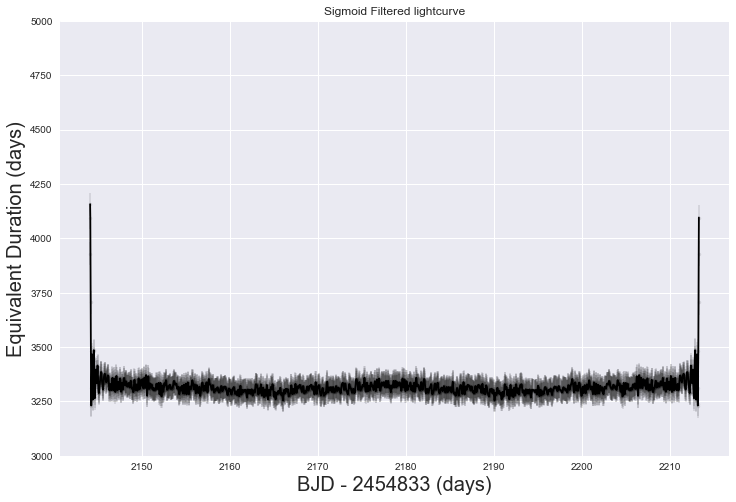

In [23]:
plt.figure(figsize=(12,8))

sflux = np.fft.irfft(sigps)

plt.plot(bjd[1:], sflux, c='k')
plt.errorbar(bjd[1:], sflux, yerr=fluxerr[1:] * 10, c='k', marker='.', alpha=0.1)

plt.ylim(3000,5000)
#plt.xlim(3000,4000)
plt.ylabel('Equivalent Duration (days)', fontsize=20)
plt.xlabel('BJD - 2454833 (days)', fontsize=20)
plt.title('Sigmoid Filtered lightcurve')
plt.savefig('Figures/sflc.png')

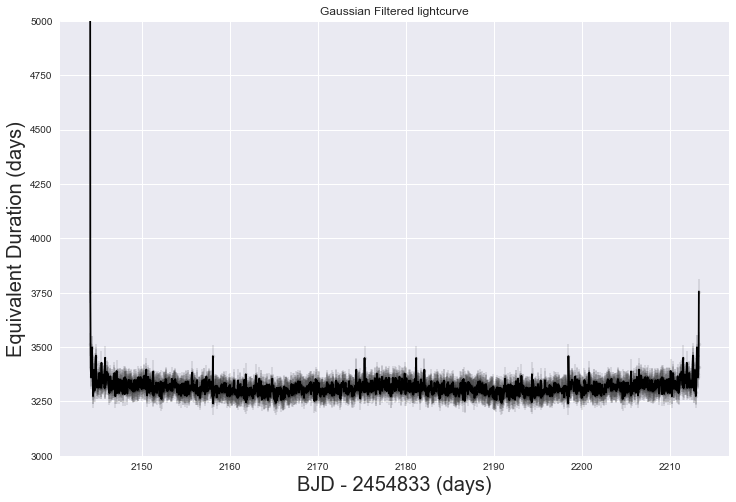

In [22]:
plt.figure(figsize=(12,8))

gflux = np.fft.irfft(gaups)

plt.plot(bjd[1:], np.fft.irfft(gaups), c='k')
plt.errorbar(bjd[1:], np.fft.irfft(gaups), yerr=fluxerr[1:] * 10, c='k', marker='.', alpha=0.1)

plt.ylim(3000,5000)
#plt.xlim(3000,4000)
plt.ylabel('Equivalent Duration (days)', fontsize=20)
plt.xlabel('BJD - 2454833 (days)', fontsize=20)
plt.title('Gaussian Filtered lightcurve')
plt.savefig('Figures/gflc.png')

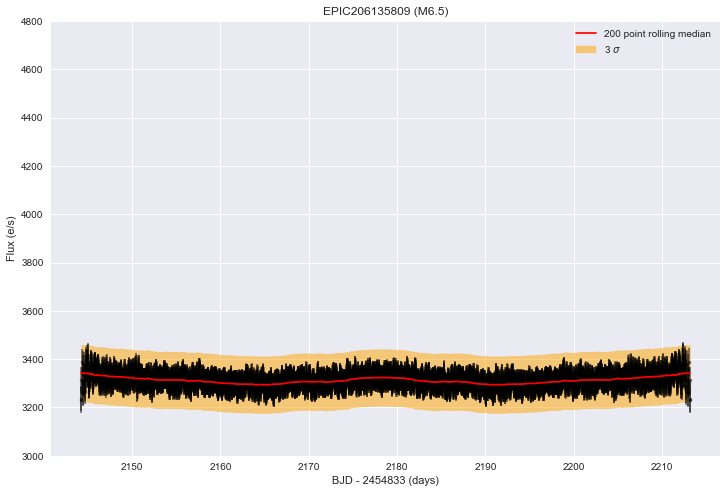

In [21]:
fluxclip = np.where(sflux < (np.median(sflux) + 3 * sflux.std()))

fig, ax = plt.subplots()
fig.set_size_inches(12., 8.)

rolling_median1 = pd.Series(sflux[fluxclip]).rolling(window = 200, min_periods = 10, center=True).median()

ax.plot(bjd[fluxclip], rolling_median1, c='red',zorder=3, label = '200 point rolling median')
ax.fill_between(bjd[fluxclip], rolling_median1 - 3 * sflux.std(), 
                rolling_median1 + 3 * sflux.std(),
                color='orange', alpha=0.5, label=r'3 $\sigma$')
ax.errorbar(bjd[fluxclip], sflux[fluxclip], 
             yerr=fluxerr[fluxclip]*10, fmt='.', color='k',alpha=0.5)


ax.set_ylim(3000,4800)
#ax.set_xlim(2144,2145)
ax.set_ylabel("Flux (e/s)")
ax.set_xlabel("BJD - 2454833 (days)")
ax.set_title('EPIC206135809 (M6.5)')
plt.legend()
plt.savefig('Figures/clipped_lc.png')

In [ ]:
Fc = pd.Series(sflux[fluxclip]).rolling(window = 200, min_periods = 0, center=True).median()
len(Fc)

In [15]:
#Find ED in each window, roll window by 1 step over all data
#ED time corresponds to center of window
#sigma clip over all calculated EDs, then choose maxima of consecutive remainders as flares.

windowsize = 10 #datapoints per window
windownum = len(bjd) - windowsize

ED_arr = np.zeros(windownum) #equivalent duration array to be output
EDerr_arr = np.zeros(windownum) #ED error array to be output

ftimes = []

for i in range(len(bjd)):
    
    window_bjd = bjd[i:i + windowsize]
    window_flux = sflux[i:i + windowsize]
    window_fluxerr = fluxerr[i:i + windowsize]
    
    ftimes.append(np.median(window_bjd))
    
    if len(window_bjd) != len(window_flux):
        break
    
    eds = np.zeros(windowsize)
    
    for f in range(len(window_flux)):
        
        eds[f] = (window_flux[f] - np.mean(Fc[i:i+windowsize])) / np.mean(Fc[i:i+windowsize])
               
    
    ED_arr[i] = np.sum(eds)

    i += 1

ftimes = ftimes[:-1]
mask = np.where(ED_arr != 0.0)
ED = ED_arr[mask]
EDerr = EDerr_arr[mask]
print(len(ED))
print(len(ftimes))

NameError: name 'sflux' is not defined

In [184]:
### DANGER ###
ftimes = ftimes[0:3153]
len(ftimes)

3153

In [185]:
### DANGER ###
ED = ED[~np.isnan(ED)]
print(len(ED))

3153


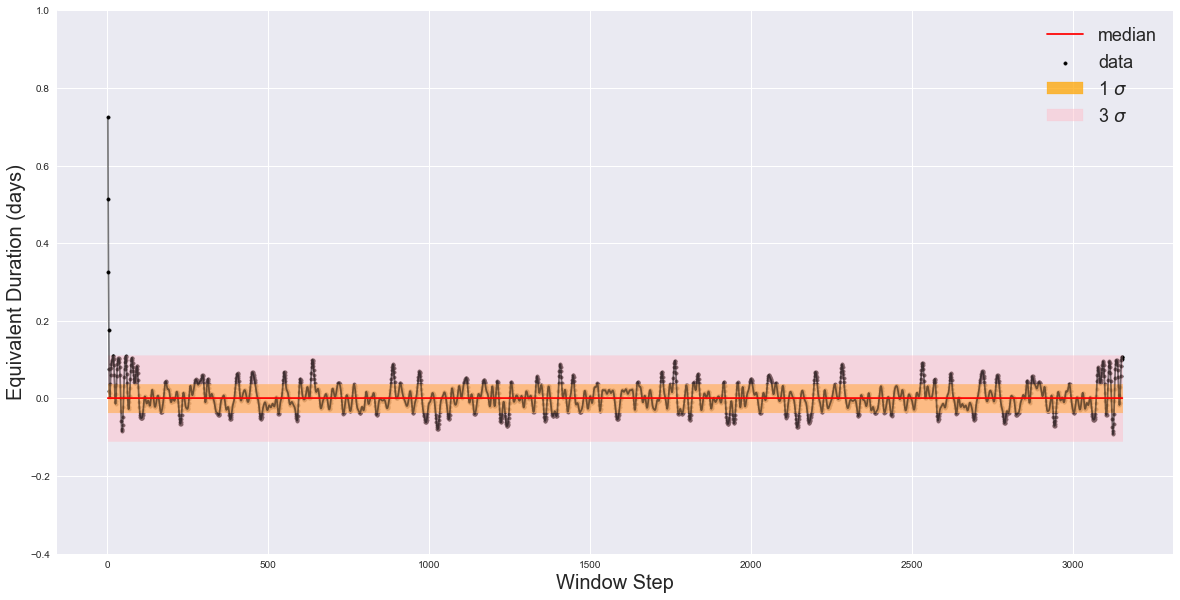

In [186]:
d = np.linspace(1,len(ED),len(ED))

plt.figure(figsize=(20,10))
plt.scatter(d, ED, marker='.', c='k', label='data')
plt.plot(d, ED, ls='-', c='k', alpha=0.5)
plt.plot(d, np.full(len(d),np.median(ED)), c='red', label='median')
plt.fill_between(d, np.full(len(d), np.median(ED) - 1 * ED.std()), np.full(len(d),np.median(ED) + 1 * ED.std()), 
                 color='orange', alpha=0.75, label=r'1 $\sigma$')
plt.fill_between(d, np.full(len(d), np.median(ED) - 3 * ED.std()), np.full(len(d),np.median(ED) + 3 * ED.std()), 
                 color='pink', alpha=0.5, label=r'3 $\sigma$')

plt.ylim(-0.4,1.0)
#plt.xlim(0,300)
plt.ylabel('Equivalent Duration (days)', fontsize=20)
plt.xlabel('Window Step', fontsize=20)
plt.legend(fontsize=18)

plt.savefig('Figures/ED_cuts.png')

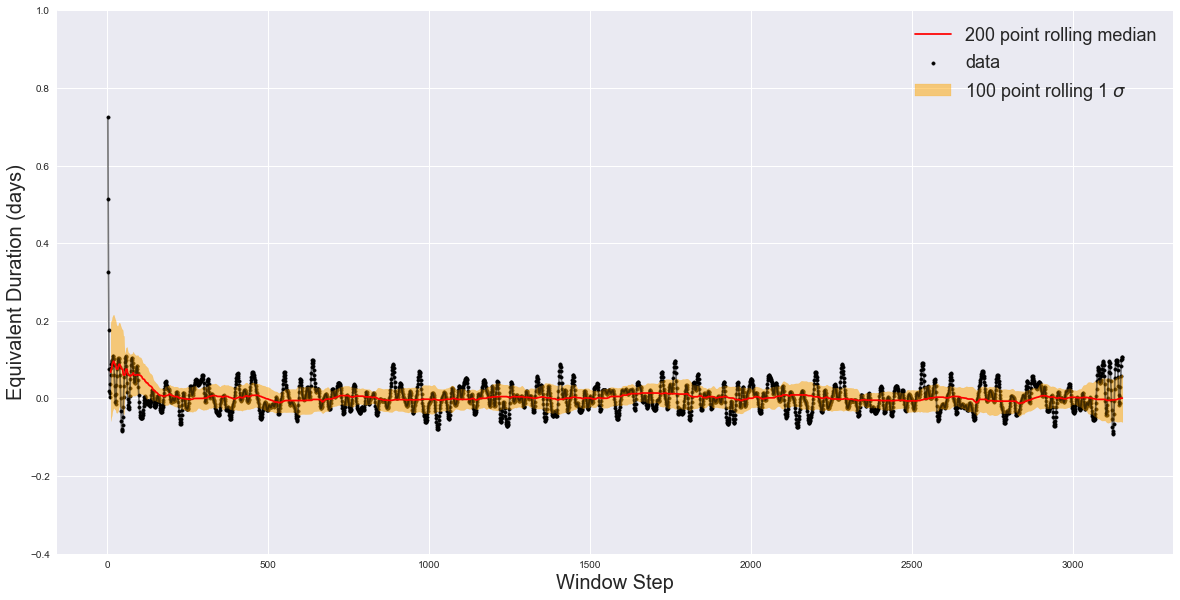

In [187]:
plt.figure(figsize=(20,10))

d = np.linspace(1,len(ED),len(ED))
ED_series = pd.Series(ED)
rolling_median = ED_series.rolling(window = 200, min_periods = 10).median()
rolling_sigma = ED_series.rolling(window = 100, min_periods=10, center=True).std()

plt.scatter(d, ED, marker='.', c='k', label='data')

plt.plot(d, ED, ls='-', c='k', alpha=0.5)
plt.plot(d, rolling_median, c='red', label='200 point rolling median')
plt.fill_between(d, rolling_median - 1 * rolling_sigma, 
                 rolling_median + 1 * rolling_sigma, 
                 color='orange', alpha=0.5, label=r'100 point rolling 1 $\sigma$')

plt.ylim(-0.4,1.0)
plt.ylabel('Equivalent Duration (days)', fontsize=20)
plt.xlabel('Window Step', fontsize=20)
plt.legend(fontsize=18)

plt.savefig('Figures/ED_cuts.png')

In [188]:
len(rolling_median), len(rolling_sigma), len(ED), len(ftimes)

(3153, 3153, 3153, 3153)

In [189]:
EDclip = np.where(ED > (rolling_median + 1 * rolling_sigma))[0]

In [190]:
breaklist = []
for i in range(len(EDclip)-1):
    if EDclip[i+1] - EDclip[i] > 1:
        breaklist.append(i+1)

In [191]:
nessies = np.split(EDclip,breaklist)
len(nessies)

56

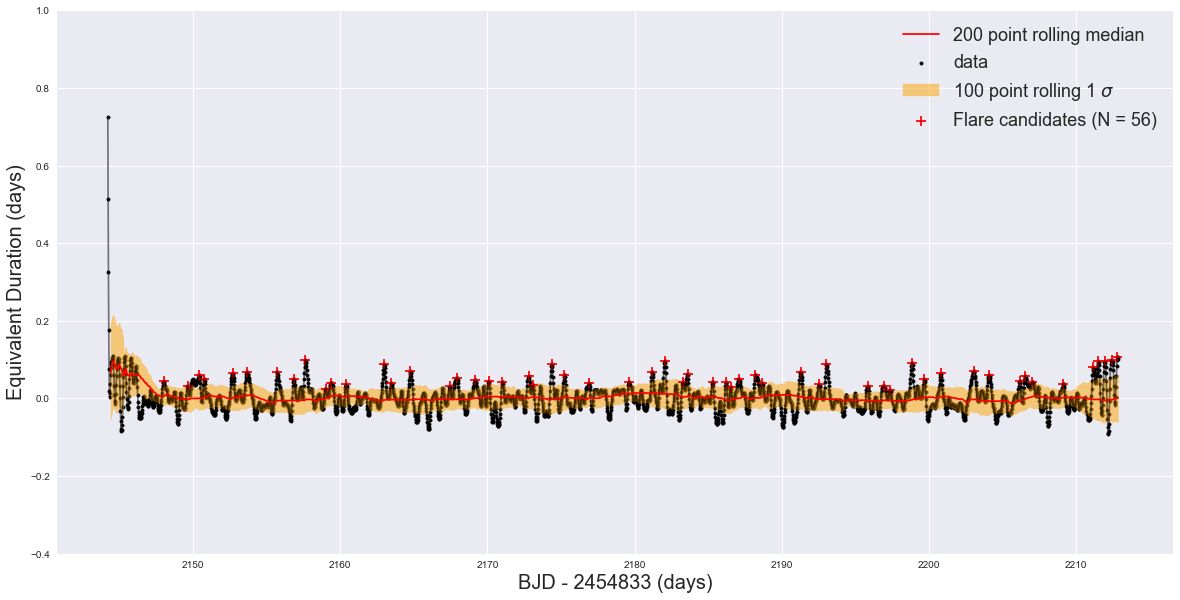

In [192]:
plt.figure(figsize=(20,10))
plt.scatter(ftimes, ED, marker='.', c='k', label='data')


plt.plot(ftimes, ED, ls='-', c='k', alpha=0.5)
plt.plot(ftimes, rolling_median, c='red', label='200 point rolling median')
plt.fill_between(ftimes, rolling_median - (1 * rolling_sigma), 
                 rolling_median + (1 * rolling_sigma), 
                 color='orange', alpha=0.5, label=r'100 point rolling 1 $\sigma$')

i=0
flrED = np.zeros(len(nessies))
flrtime = np.zeros(len(nessies))
for ness in nessies:
    flrED[i] = ED[ness].max()
    flrtime_index = int(ness[np.where(ED[ness] == ED[ness].max())[0]])
    flrtime[i] = ftimes[flrtime_index]
    i += 1


plt.scatter(flrtime,flrED,marker='+',c='red',s=100, label='Flare candidates (N = {})'.format(len(nessies)))
    
plt.ylim(-0.4,1.0)
#plt.xlim(2150,2160)
plt.ylabel('Equivalent Duration (days)', fontsize=20)
plt.xlabel('BJD - 2454833 (days)', fontsize=20)
plt.legend(fontsize=18)

plt.savefig('Figures/ED_flrs.png')

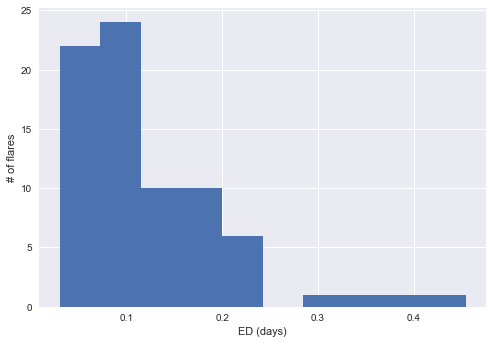

In [22]:
plt.hist(flrED, bins=10)
plt.xlabel('ED (days)')
plt.ylabel('# of flares')
plt.savefig('Figures/ED_hist')

-Change Fc to a rolling median in clipped_lc plot

-Do Fourier transform of ED plot, subtract out any sharp frequencies, then do inverse FT (Federica will send example nb?)

-Do some tweaking on various knobs (window size, rolling_sigma, etc.) to try to get close to Nflare = 50

-THEN attempt to propagate uncertainties (Ff -> ED -> Energy) & add to FFDs